<a href="https://colab.research.google.com/github/andrelbourgeois/CASA0018/blob/main/whichImage2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.9.2
shape: (28, 28)
label: 8
Epoch 1/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4935 - accuracy: 0.8257
Epoch 2/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3748 - accuracy: 0.8653
Epoch 3/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3368 - accuracy: 0.8768
Epoch 4/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3121 - accuracy: 0.8858
Epoch 5/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2943 - accuracy: 0.8918
Epoch 6/6
313/313 [==============================] - 1s 2ms/step
0.00000029
0.00000000
0.00000004
0.00000000
0.00000002
0.00286031
0.00000069
0.01619998
0.00001928
0.98091936
9
[2.8548911e-07 4.9422000e-10 4.4749019e-08 4.3561221e-10 1.8935140e-08
 2.8603103e-03 6.8627406e-07 1.6199978e-02 1.9282757e-05 9.8091936e-01]


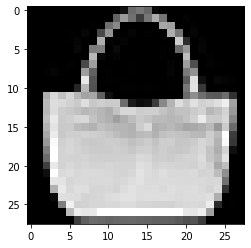

In [ ]:
#import tensorflow
import tensorflow as tf

#import a lib to help display an image
import matplotlib.pyplot as plt

#print tf version
print(tf.__version__)
#create a variable that points to mnist fashion data using the tf.keras API
mnist = tf.keras.datasets.fashion_mnist

#create two list and load a training and a testing list with mnist fashion data
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

#set a sample variable
sample = 100;

#print shape of sample variable from training images list
print("shape:", training_images[sample].shape)

plt.imshow(training_images[sample], cmap="gray")
print("label:", training_labels[sample])

#to normalize the data the datasets can be divided over 255.0
#this is because each pixel in the image can have a value between 0 and 255
#this process generally speeds up learning and leads to faster convergence
training_images = training_images / 255.0
test_images = test_images / 255.0

#building the model

#to create the sequence of layers in the model we use "Sequential"
#the first layer - Flatten - takes the 28x28 image and turns it into a 1D set
#the first layer should be the same as your data
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    #second - Dense - contains 128 neurons
                                    # relu (rectified linear unit) - converts negative values to 0
                                    # helps to keep us between 0 and 1
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    #third - Dense - contains 10 neurons; one for each fashion category
                                    #note the input to the model is a 28x28 image and the output is one of 10 neurons which relates to the 10 fashion categories.
                                    #softmax - sets highest probability in neuron layer to 1 and rest to 0
                                    #makes it easier to find most likely solution
                                    #the number of neurons in the last layer
                                    #should match the number of classes you are classifying for
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                    ])

#compile with an optimizer and a loss function
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

#train model by calling model.fit (train with training data)
model.fit(training_images, training_labels, epochs=6)

#evaluate model by calling model.evaluate (evaluate with testing data)
model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

for x in classifications[0]:
  print("{:0.8f}".format(x))

  
print(test_labels[0])
print(classifications[0])
